# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

# Differences with Paper

1) The paper experiments with 4 classes. The authors have grouped car drivers and car passengers into one class: "car". In this dataset we will experiment with 5 classes: car driver, bike, 
walk, car passenger and public transport. We will start by experimenting classification with all 5 classes. Afterwards, we will group public transport and car passengers into one class:
Shared transport. We will experiment classification again with 4 classes: car driver, bike, walk, Shared transport. Lastly, we will group Shared transport and bike into one class: Sustainable
Transport. We will experimentt classification again now with 3 classes: car driver, walk, sustainable transport

2. The paper uses data from 2010-2012 which are a little outdated. They also use 17 features. We will use data from 2018-2022 experimenting with entirely different features.  Also our dataset
   is significantly larger

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,OPID,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,15,10,30,1
1,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,10,11,15,1
2,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,15,55,5
3,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,18,30,5
4,5.583410e+10,2,2,1,42,1,3,1,1,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,5,8,8,110,35,15,56,1
817122,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,11,7,16,50,6
817123,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,6,5,17,15,6
817124,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,7,8,8,63,15,18,20,1


In [6]:
df = df.drop("OPID", axis=1)
df

,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


In [7]:
print(df.columns)

Index(['HHPers', 'HHSam', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'VertProv', 'AankProv',
       'AfstR', 'RReisduur', 'RVertUur', 'RVertMin', 'KRvm'],
      dtype='object')


In [8]:
new_columns= {"HHPers": "People_in_house", "HHSam": "Household_composition", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
              "Feestdag": "Holiday", "Toer": "Round_trip", "KMotiefV": "Motive", "VertProv": "Departure_area", "AankProv": "Arrival_area",
              "AfstR": "Distance", "RReisduur": "Duration", "RVertUur": "Dep_hour", "RVertMin": "Dep_min", "KRvm": "Mode"}

In [9]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Dep_hour,Dep_min,Mode
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorial - Nominal
3) Gender - Male / Female - Categorial - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorial - Nominal
6) Education - Highest education completed for the respondent - Categorial - Ordinal
7) Drivel_License - If the respondent has car driving license - Categorial - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorial - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorial - Nominal
13) Weekday - Day that the trip occured - Categorial - Nominal
14) Holiday - If the trip occured on a national holiday - Categorial - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorial - Binary
16) Motive - The reason of the trip - Categorial - Nominal
17) Departure_area - The departure province of the trip - Categorial - Nominal
18) Arrival_area - The arrival province of the trip - Categorial - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Dep_hour - The hour of the departure for the trip - Numeric
22) Dep_min - The minute of the departure for the trip - Numeric
23) Mode - The mode of transportation for the trip - Categorial - Nominal - Target variable

In [9]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Dep_hour                 False
Dep_min                  False
Mode                     False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817126 entries, 0 to 817125
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   People_in_house        817126 non-null  int64
 1   Household_composition  817126 non-null  int64
 2   Gender                 817126 non-null  int64
 3   Age                    817126 non-null  int64
 4   Background             817126 non-null  int64
 5   Education              817126 non-null  int64
 6   Driver_license         817126 non-null  int64
 7   Cars_in_house          817126 non-null  int64
 8   Mopeds_in_house        817126 non-null  int64
 9   Electric_bike          817126 non-null  int64
 10  Year                   817126 non-null  int64
 11  Month                  817126 non-null  int64
 12  Weekday                817126 non-null  int64
 13  Holiday                817126 non-null  int64
 14  Round_trip             817126 non-null  int64
 15  Motive           

# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [10]:
df['Household_composition'].value_counts()

Household_composition
3    368673
2    244431
1    133543
6     52703
4      8230
8      4092
5      3607
7      1847
Name: count, dtype: int64

In [11]:
df['Household_composition'] = df['Household_composition'].map({1:"One person household", 2:"Couple", 3:"Couple and kids",
                                                               4:"Couple, kids and others", 5:"Couple and others", 6:"Single parent and kids",
                                                               7:"Single parents, kids and others", 8:"Other composition"})

In [12]:
df['Gender'].value_counts()

Gender
2    422790
1    394336
Name: count, dtype: int64

In [13]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [14]:
df['Background'].value_counts()

Background
1    651807
3     86300
2     79019
Name: count, dtype: int64

In [15]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Western migration", 3:"Non Western migration"})

In [16]:
df['Education'].value_counts()

Education
4    340802
3    235794
2    103372
7     87867
1     25377
5     16740
0      7174
Name: count, dtype: int64

In [17]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Not answered/under 15 years of age"})

In [18]:
df['Driver_license'].value_counts()

Driver_license
1    613428
0    203698
Name: count, dtype: int64

In [19]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [20]:
df['Electric_bike'].value_counts()

Electric_bike
0    577170
1    239956
Name: count, dtype: int64

In [21]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [22]:
df['Month'].value_counts()

Month
9     76074
11    73841
1     73073
10    72723
3     68753
5     68748
6     67710
8     66030
7     63645
12    63642
2     61974
4     60913
Name: count, dtype: int64

In [23]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [24]:
df['Weekday'].value_counts()

Weekday
6    129692
5    123107
3    120566
4    120321
7    117903
2    117808
1     87729
Name: count, dtype: int64

In [25]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [26]:
df['Holiday'].value_counts()

Holiday
0    803915
1     13211
Name: count, dtype: int64

In [27]:
df['Holiday'] = df['Holiday'].map({0:"No", 1:"Yes"})

In [28]:
df['Round_trip'].value_counts()

Round_trip
0    718254
1     98872
Name: count, dtype: int64

In [29]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [30]:
df['Departure_area'].value_counts()

Departure_area
9     201745
8     137380
11    101262
7      94283
6      86312
4      46792
12     44754
2      23707
1      23210
5      21570
3      18352
10     14970
0       2789
Name: count, dtype: int64

In [31]:
df['Departure_area'] = df['Departure_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [32]:
df['Arrival_area'].value_counts()

Arrival_area
9     202117
8     137388
11    101351
7      94477
6      86381
4      46782
12     44752
2      23653
1      23213
5      21549
3      18273
10     14905
0       2285
Name: count, dtype: int64

In [33]:
df['Arrival_area'] = df['Arrival_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [34]:
df['Motive'].value_counts()

Motive
4    172823
7    142804
1    136036
9     92603
8     81462
6     80501
5     64548
3     26729
2     19620
Name: count, dtype: int64

In [35]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [36]:
df['Mode'].value_counts()

Mode
1    267952
5    236240
6    201052
2     83304
4     28578
Name: count, dtype: int64

In [37]:
df['Mode'] = df['Mode'].map({1:"car driver", 2:"car passenger", 4:"public transport", 5:"bike", 6:"walk"})

In [38]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Dep_hour                 False
Dep_min                  False
Mode                     False
dtype: bool

In [71]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
69,4,Couple and kids,Male,7,Dutch,Not answered/under 15 years of age,No,1,0,Yes,...,Wednesday,No,No,Education,Groningen,Groningen,5,bike,8.10,1.2
70,4,Couple and kids,Male,7,Dutch,Not answered/under 15 years of age,No,1,0,Yes,...,Wednesday,No,No,Education,Groningen,Groningen,10,bike,12.30,2.0
71,4,Couple and kids,Male,7,Dutch,Not answered/under 15 years of age,No,1,0,Yes,...,Wednesday,No,No,Social and recreational,Groningen,Groningen,5,walk,14.45,1.0
72,4,Couple and kids,Male,7,Dutch,Not answered/under 15 years of age,No,1,0,Yes,...,Wednesday,No,No,Visits,Groningen,Groningen,10,bike,16.00,3.0
73,4,Couple and kids,Male,7,Dutch,Not answered/under 15 years of age,No,1,0,Yes,...,Wednesday,No,No,Visits,Groningen,Groningen,2,car passenger,17.40,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817075,4,Couple and kids,Female,9,Dutch,Not answered/under 15 years of age,No,1,0,No,...,Wednesday,No,No,Shopping/Grocery,Groningen,Groningen,6,car passenger,14.30,1.2
817076,4,Couple and kids,Female,9,Dutch,Not answered/under 15 years of age,No,1,0,No,...,Wednesday,No,No,Shopping/Grocery,Groningen,Groningen,7,car passenger,15.50,1.2
817117,4,Couple and kids,Female,9,Dutch,Not answered/under 15 years of age,No,2,0,No,...,Monday,No,No,Education,North Holland,North Holland,5,car passenger,8.20,1.2
817118,4,Couple and kids,Female,9,Dutch,Not answered/under 15 years of age,No,2,0,No,...,Monday,No,No,Visits,North Holland,North Holland,15,bike,14.15,2.0


In [39]:
df.duplicated().sum()

0

# Data Cleaning

In [41]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Distance,Duration,Dep_hour,Dep_min
count,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000
mean,2.851406,42.509751,1.377535,0.206400,2020.034843,93.802809,23.310338,13.608488,20.512250
std,1.387196,20.709015,1.000008,0.591793,1.441797,195.779205,31.219722,4.226496,17.442497
min,1.000000,6.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,10.000000,8.000000,10.000000,0.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,30.000000,15.000000,14.000000,20.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,80.000000,30.000000,17.000000,30.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,6600.000000,993.000000,33.000000,59.000000


We see that for Dep_hour the max value is 33 which is false because the max should be 23. We also exclude 24 because after 23.59 the clock
goes to 00.00

In [39]:
df = df[(df['Dep_hour'] <= 23)]

We will also create a new column based on Dep_hour and Dep_min that has the departure time 

In [40]:
df['Depart_time'] = df['Dep_hour'].astype(str) + '.' + df['Dep_min'].astype(str).str.zfill(2)

In [41]:
df['Depart_time'] = df['Depart_time'].astype(float)

We will drop now the Dep_hour and Dep_min columns

In [42]:
drops = ["Dep_hour", "Dep_min"]
df = df.drop(drops, axis=1)

The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [43]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [44]:
df = df.drop("Distance", axis=1)

In [45]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,15,car driver,10.30,6.0
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,10,car driver,11.15,6.0
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Visits,Groningen,Groningen,5,bike,15.55,1.0
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Visits,Groningen,Groningen,5,bike,18.30,1.0
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,Friday,No,No,Shopping/Grocery,Groningen,Groningen,10,car driver,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Education,North Holland,North Holland,35,car driver,15.56,11.0
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,7,walk,16.50,1.1
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,5,walk,17.15,0.6
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Social and recreational,North Holland,North Holland,15,car driver,18.20,6.3


In [45]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,816777.000000,816777.000000,816777.000000,816777.00000,816777.000000,816777.000000,816777.000000,816777.000000
mean,2.851618,42.514775,1.377689,0.20643,2020.034902,23.313720,13.809079,9.382371
std,1.387158,20.710138,0.999730,0.59184,1.441766,31.225038,4.218239,19.581201
min,1.000000,6.000000,0.000000,0.00000,2018.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.00000,2019.000000,8.000000,10.300000,1.000000
50%,3.000000,43.000000,1.000000,0.00000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.00000,2021.000000,30.000000,17.000000,8.000000
max,10.000000,99.000000,10.000000,19.00000,2022.000000,993.000000,23.590000,660.000000


We will also remove samples where Distance and Duration are 0

In [46]:
df = df[(df['Distance_in_kms'] > 0)]

In [47]:
df = df[(df['Duration'] > 0)]

In [48]:
df.shape

(816542, 22)

In [48]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000
mean,2.851746,42.515697,1.377718,0.206449,2020.035010,23.320429,13.809361,9.385071
std,1.387177,20.711172,0.999618,0.591878,1.441738,31.227026,4.218189,19.583372
min,1.000000,6.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,8.000000,10.300000,1.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,8.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,23.590000,660.000000


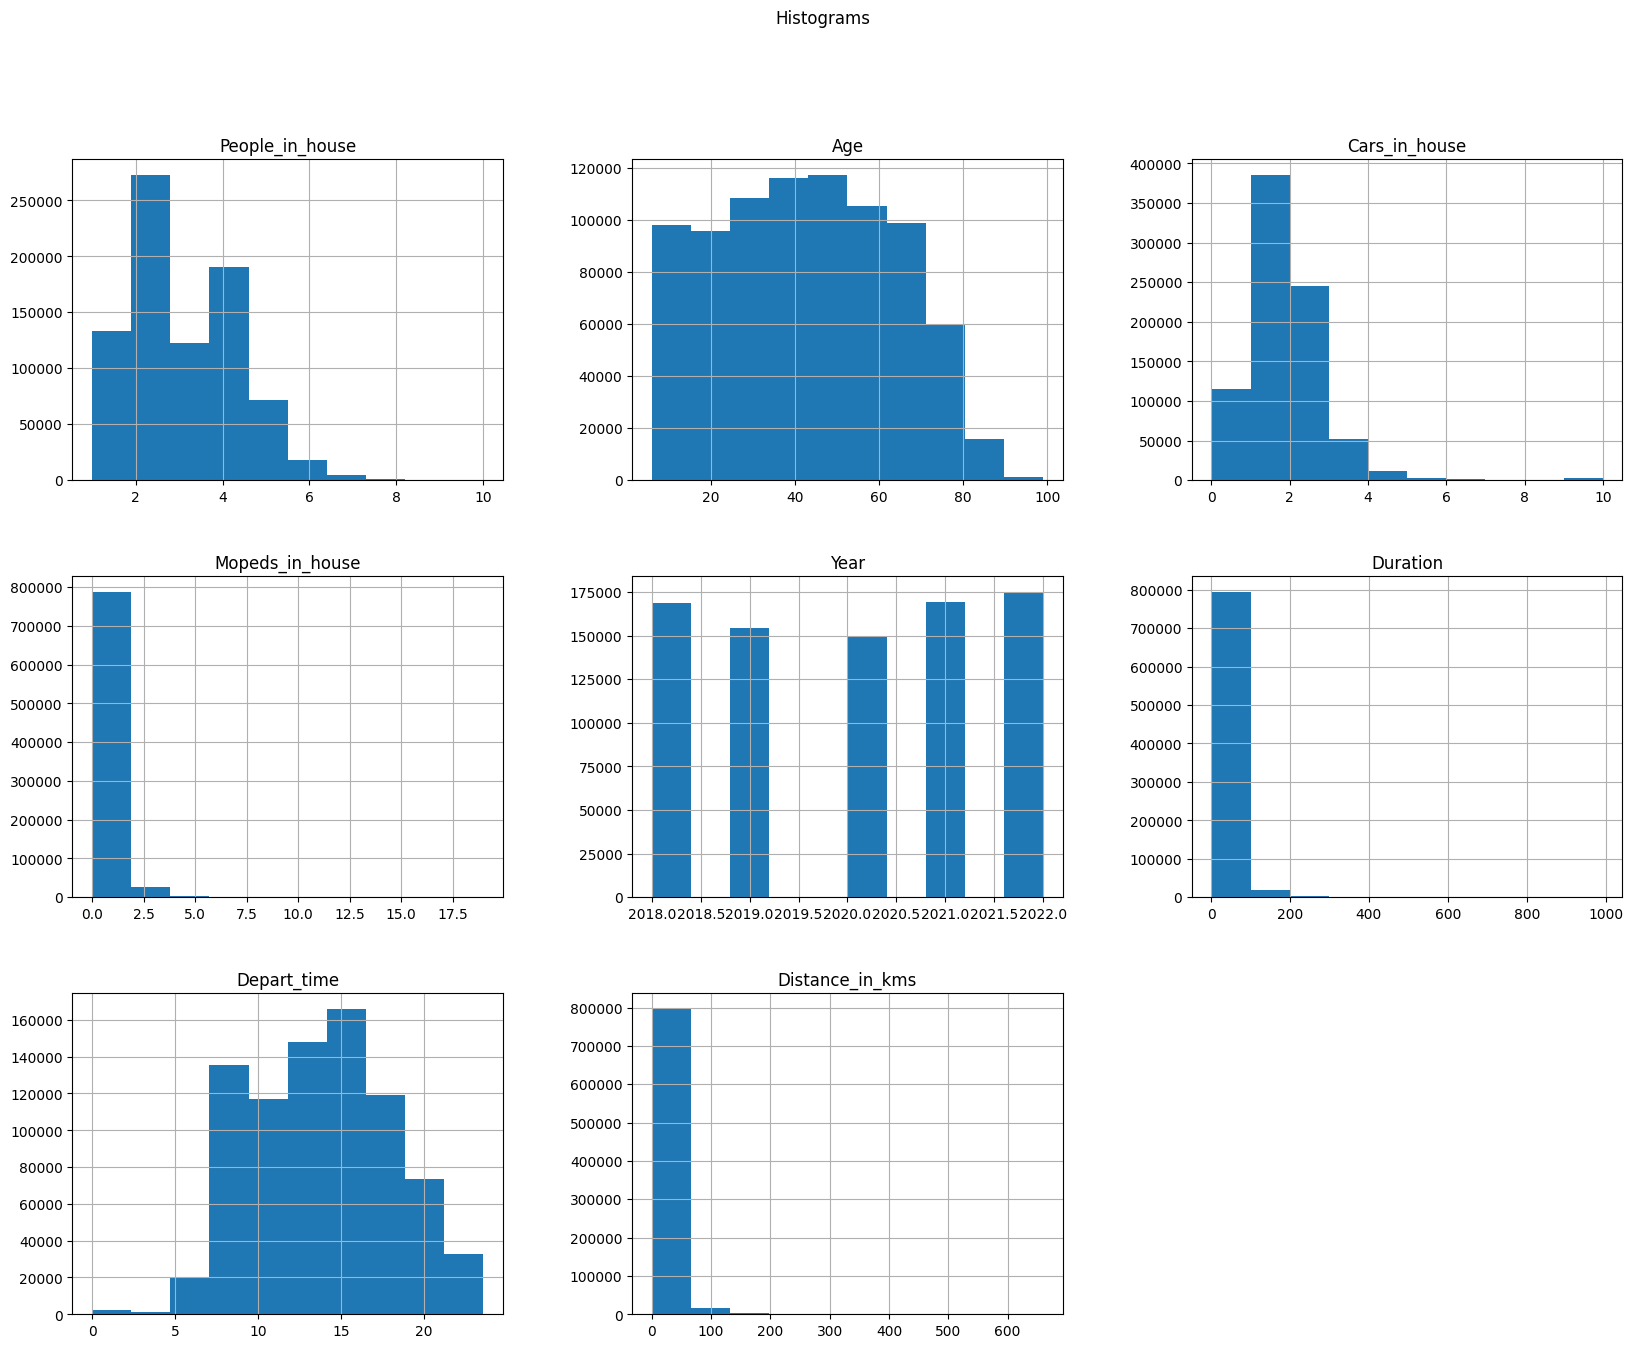

In [49]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [49]:
df = df[(df['Duration'] <= 200)]

In [50]:
df = df[(df['Distance_in_kms'] <= 130)]

In [51]:
df = df[(df['Mopeds_in_house'] <= 4)]

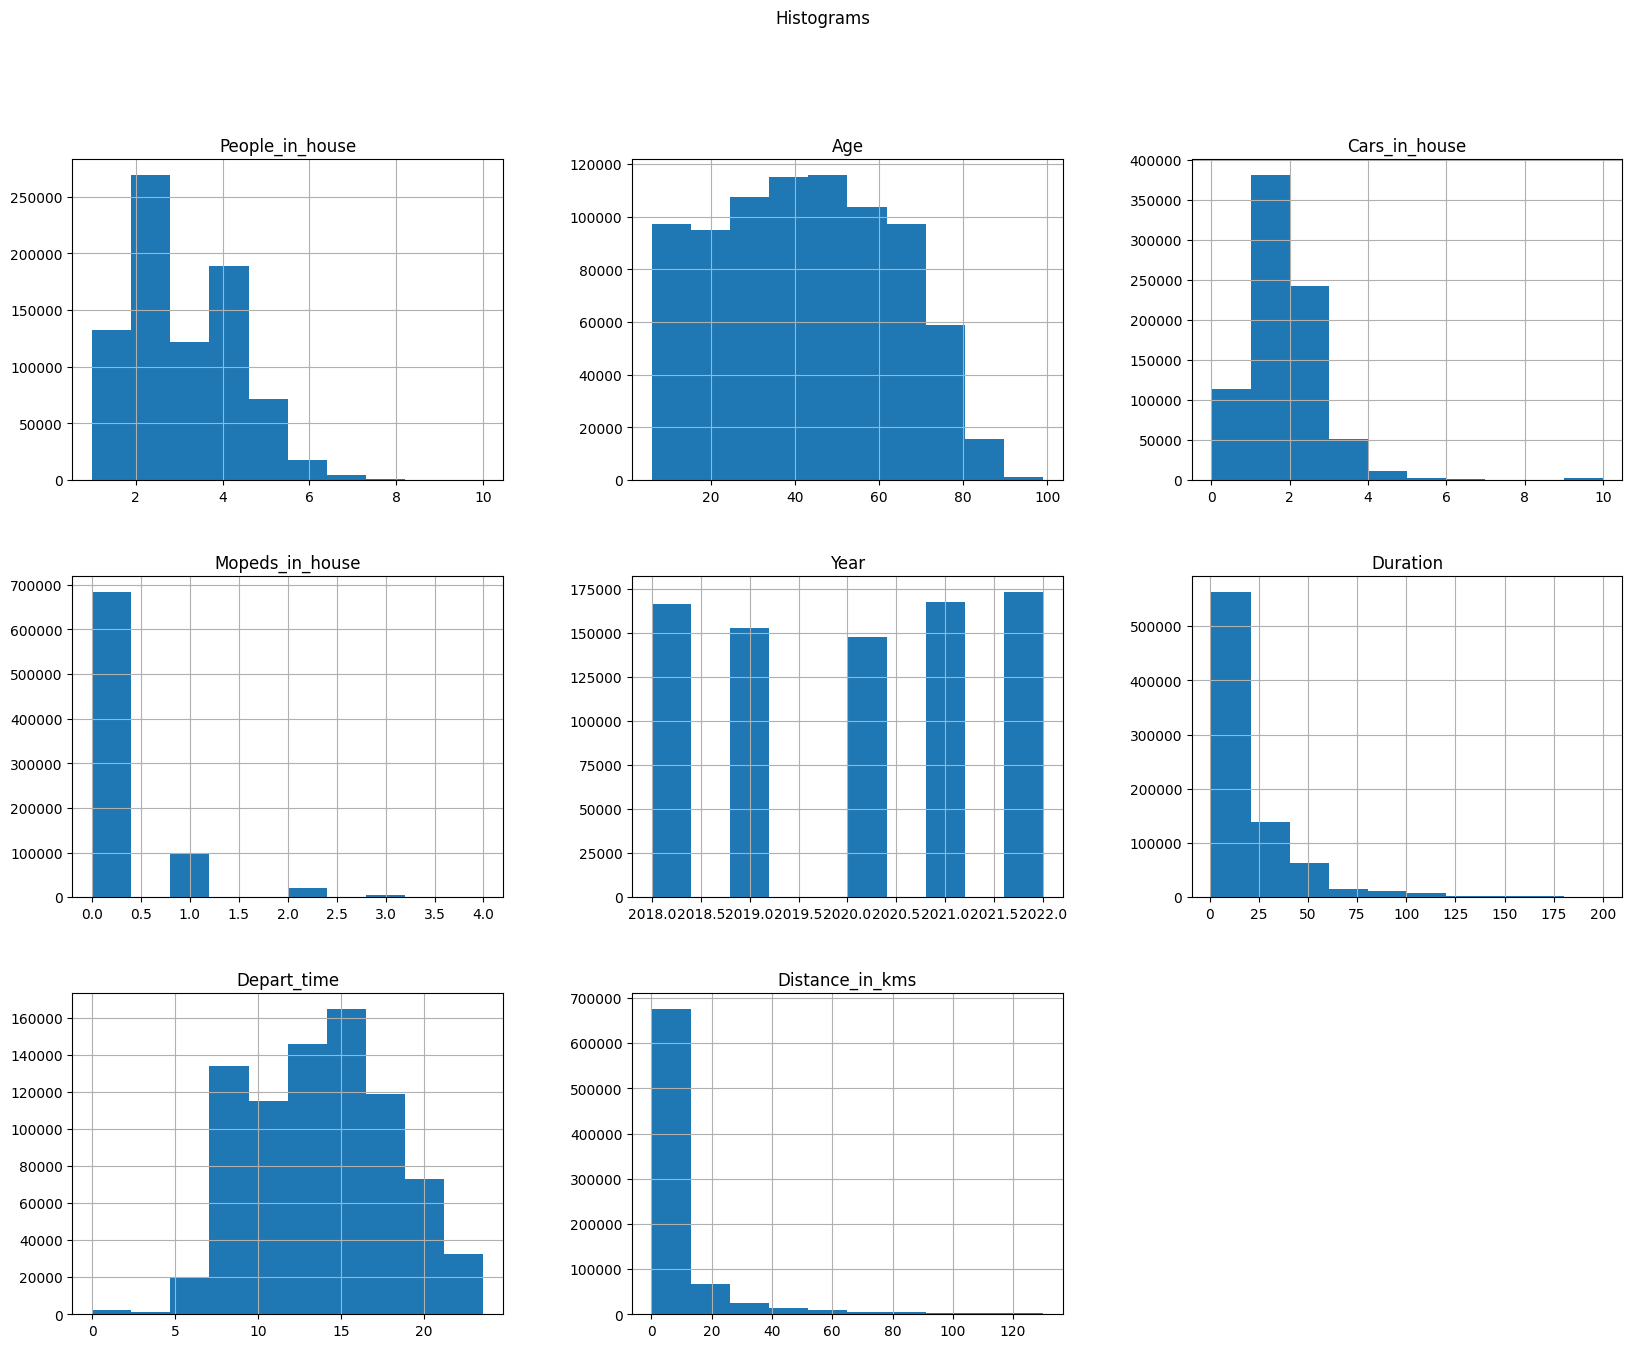

In [52]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We also want to ensure that there are no samples where Age is lower than 18 while also have a driver license, because those are not possible to occur.

In [53]:
df = df[~((df['Age'] < 18) & (df['Driver_license'] == 'Yes'))]

We also want to ensure that respondents with age lower than 18 cannot be car drivers

In [54]:
df = df[~((df['Age'] < 18) & (df['Mode'] == 'car driver'))]

We will also remove samples where respondends are car drivers, with no driving license

In [55]:
df = df[~((df['Mode'] == 'car driver') & (df['Driver_license'] == 'No'))]

In [56]:
df.shape

(802567, 22)

In [58]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,802567.000000,802567.000000,802567.000000,802567.000000,802567.000000,802567.000000,802567.000000,802567.000000
mean,2.852671,42.476335,1.375079,0.195141,2020.036414,21.555064,13.823815,8.423872
std,1.387702,20.719497,0.995984,0.516085,1.441585,23.353601,4.219443,15.524205
min,1.000000,6.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,8.000000,10.300000,1.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,8.000000
max,10.000000,99.000000,10.000000,4.000000,2022.000000,200.000000,23.590000,130.000000


# Explanatory Data Analysis

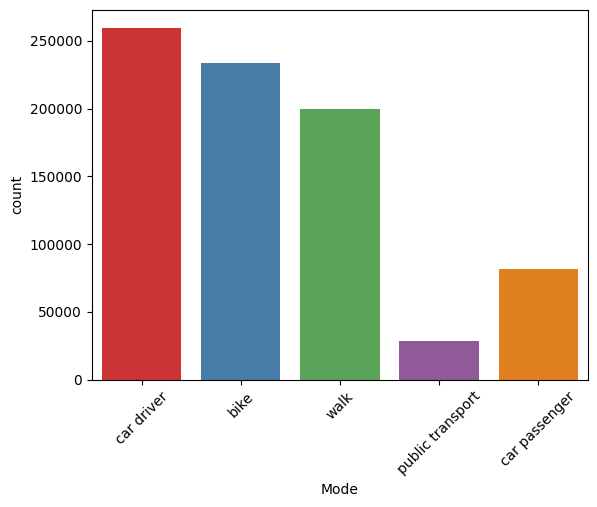

In [59]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.show()

In [60]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car driver          32.375241
bike                29.082183
walk                24.860230
car passenger       10.147190
public transport     3.535157
Name: proportion, dtype: float64


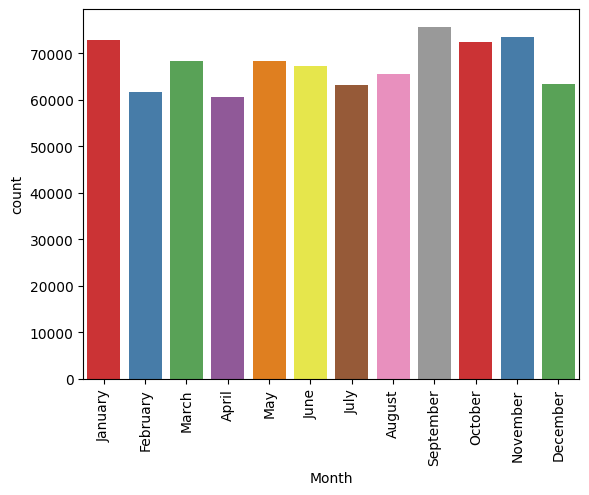

In [69]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [71]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.306446
November     9.040730
January      8.949740
October      8.906090
March        8.419046
May          8.410931
June         8.285512
August       8.067874
December     7.793797
July         7.776951
February     7.585995
April        7.456887
Name: proportion, dtype: float64


In [74]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

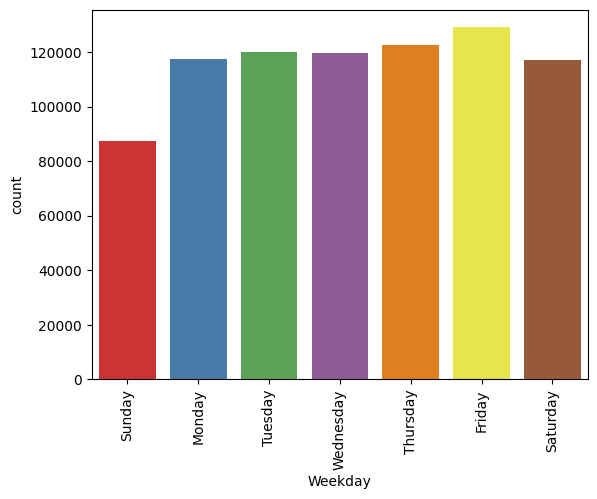

In [75]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.show()

In [76]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.870646
Thursday     15.066245
Tuesday      14.769912
Wednesday    14.729089
Monday       14.430297
Saturday     14.412960
Sunday       10.720851
Name: proportion, dtype: float64


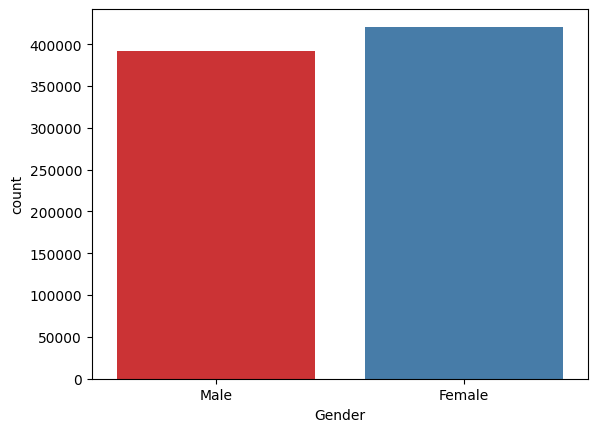

In [77]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [78]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.762196
Male      48.237804
Name: proportion, dtype: float64


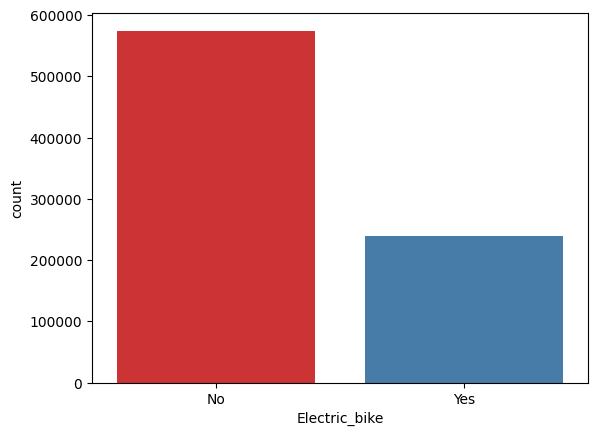

In [80]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.show()

In [81]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     70.663552
Yes    29.336448
Name: proportion, dtype: float64


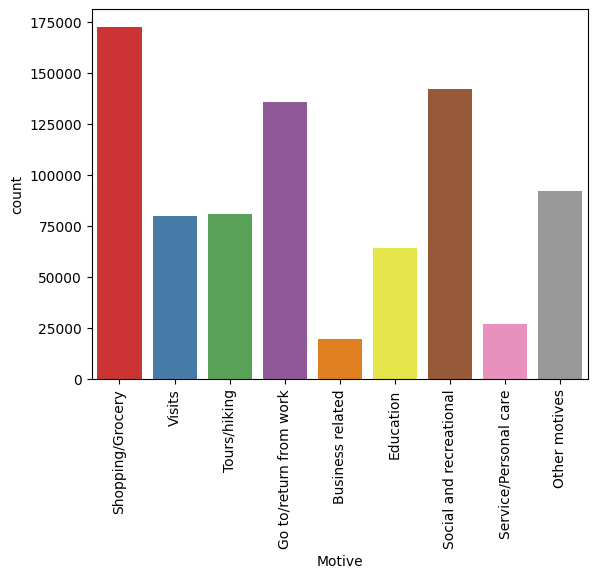

In [82]:
sns.countplot(x='Motive', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [83]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.204881
Social and recreational    17.445268
Go to/return from work     16.664720
Other motives              11.346224
Tours/hiking                9.924072
Visits                      9.823368
Education                   7.912207
Service/Personal care       3.281793
Business related            2.397467
Name: proportion, dtype: float64


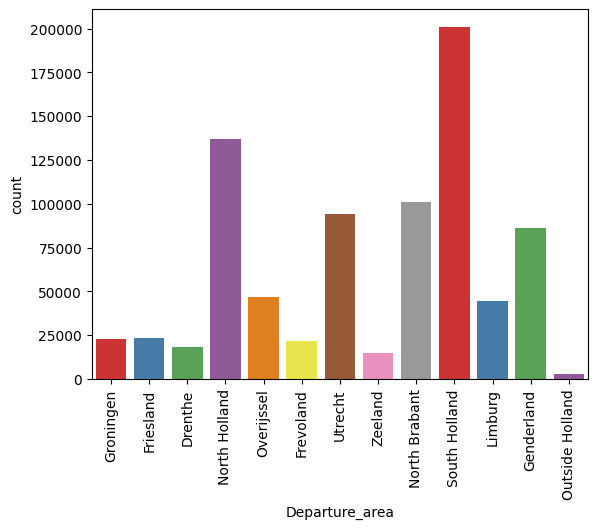

In [85]:
sns.countplot(x='Departure_area', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [86]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.707018
North Holland      16.821124
North Brabant      12.398020
Utrecht            11.558575
Genderland         10.568381
Overijssel          5.725493
Limburg             5.465556
Friesland           2.888814
Groningen           2.836802
Frevoland           2.644370
Drenthe             2.240939
Zeeland             1.828410
Outside Holland     0.316498
Name: proportion, dtype: float64


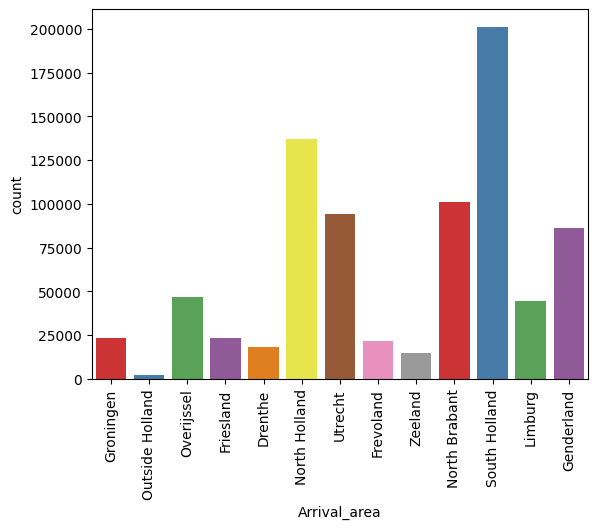

In [88]:
sns.countplot(x='Arrival_area', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [89]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.744275
North Holland      16.824444
North Brabant      12.408964
Utrecht            11.578125
Genderland         10.573791
Overijssel          5.724017
Limburg             5.465802
Friesland           2.882789
Groningen           2.836433
Frevoland           2.640927
Drenthe             2.230980
Zeeland             1.822016
Outside Holland     0.267437
Name: proportion, dtype: float64


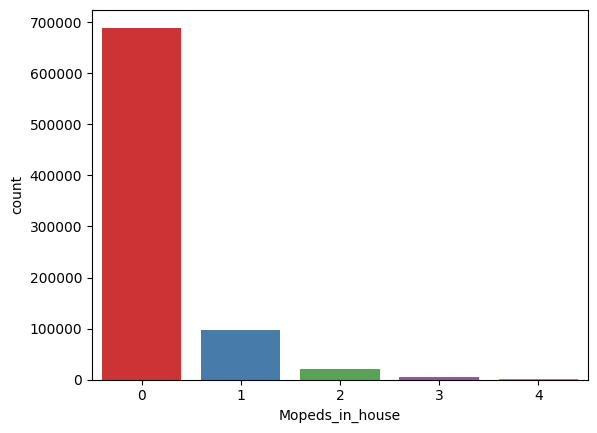

In [91]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [92]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.799361
1    11.878393
2     2.540961
3     0.592174
4     0.189112
Name: proportion, dtype: float64


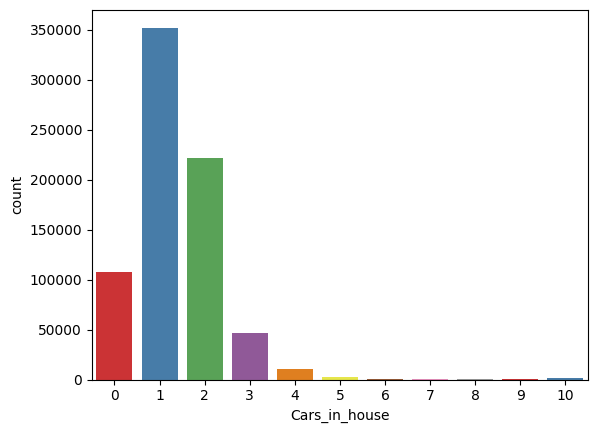

In [125]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [126]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.303693
2     29.720519
0     14.478087
3      6.286232
4      1.449945
5      0.338365
10     0.235566
6      0.110728
7      0.038567
9      0.021232
8      0.017066
Name: proportion, dtype: float64


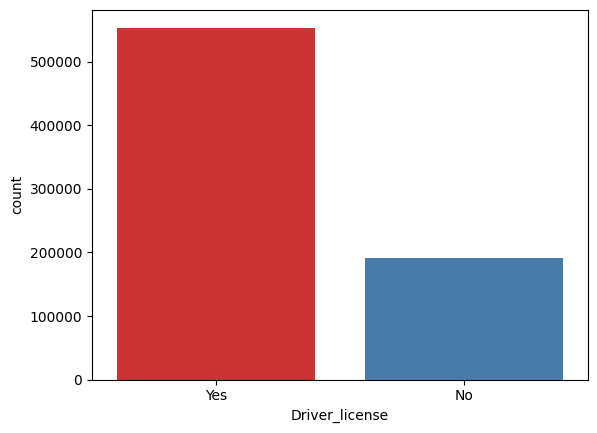

In [127]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.show()

In [128]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    74.381254
No     25.618746
Name: proportion, dtype: float64


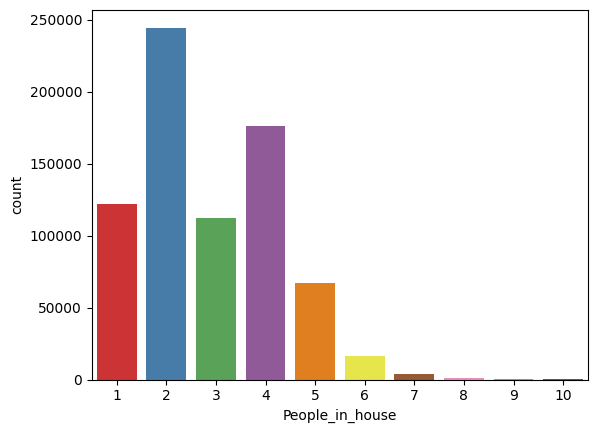

In [129]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.show()

In [130]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     32.874520
4     23.661522
1     16.355087
3     15.077281
5      8.979851
6      2.209991
7      0.557537
8      0.169451
9      0.064099
10     0.050661
Name: proportion, dtype: float64


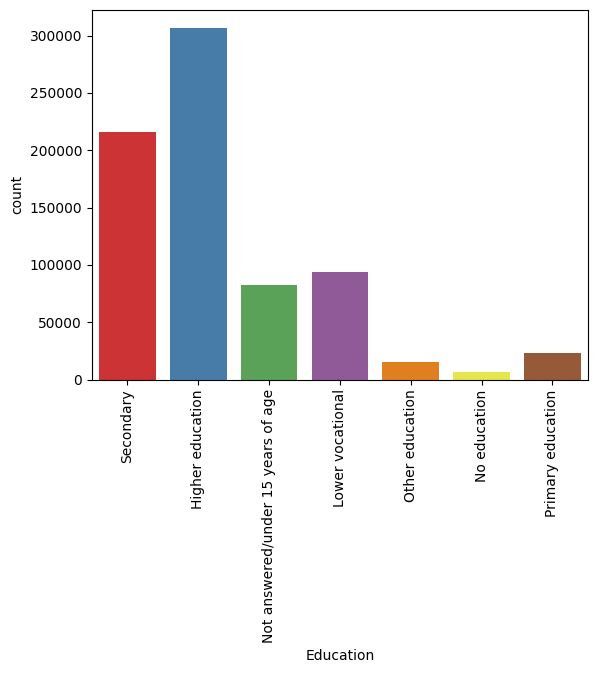

In [132]:
sns.countplot(x='Education', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [133]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education                      41.251952
Secondary                             29.008447
Lower vocational                      12.591949
Not answered/under 15 years of age    11.090536
Primary education                      3.160316
Other education                        2.025758
No education                           0.871042
Name: proportion, dtype: float64


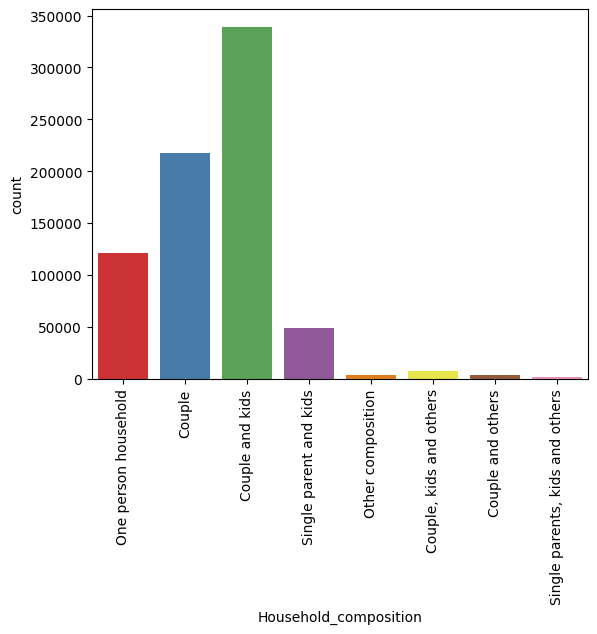

In [134]:
sns.countplot(x='Household_composition', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [136]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    45.576659
Couple                             29.299780
One person household               16.355087
Single parent and kids              6.589256
Couple, kids and others             1.005690
Other composition                   0.505936
Couple and others                   0.436462
Single parents, kids and others     0.231131
Name: proportion, dtype: float64


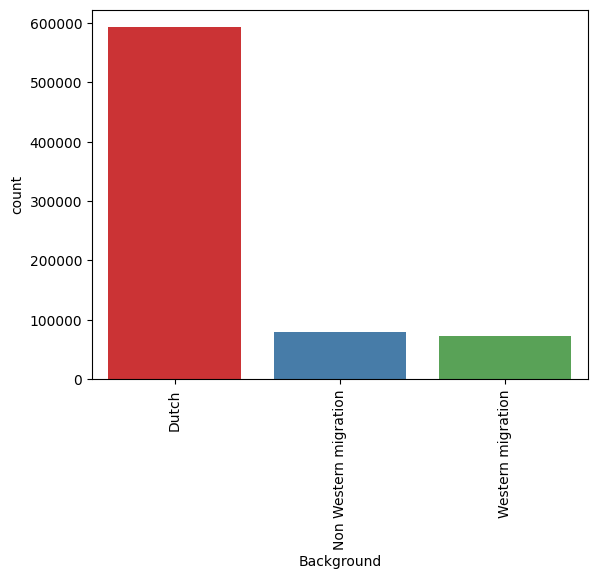

In [137]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [139]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch                    79.680340
Non Western migration    10.623436
Western migration         9.696224
Name: proportion, dtype: float64


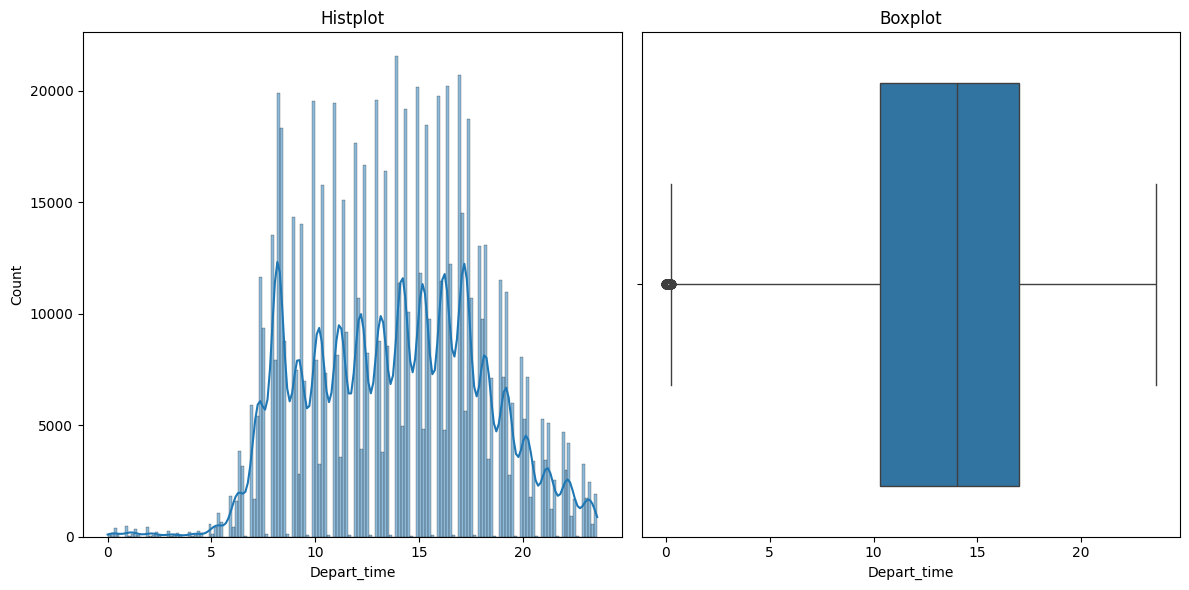

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Depart_time', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Depart_time', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

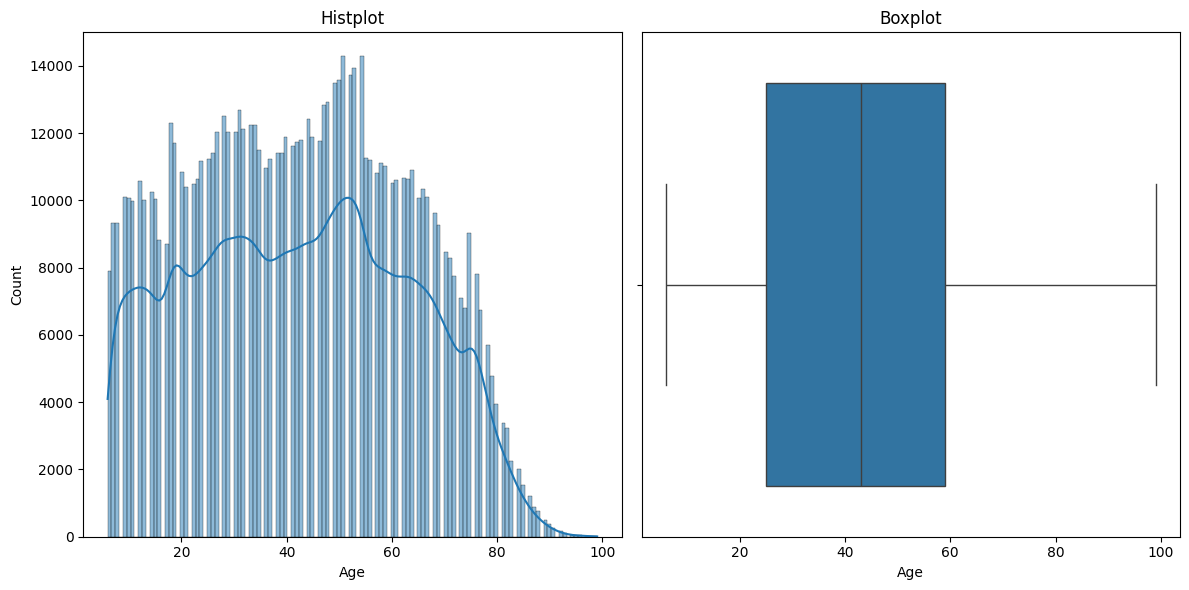

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

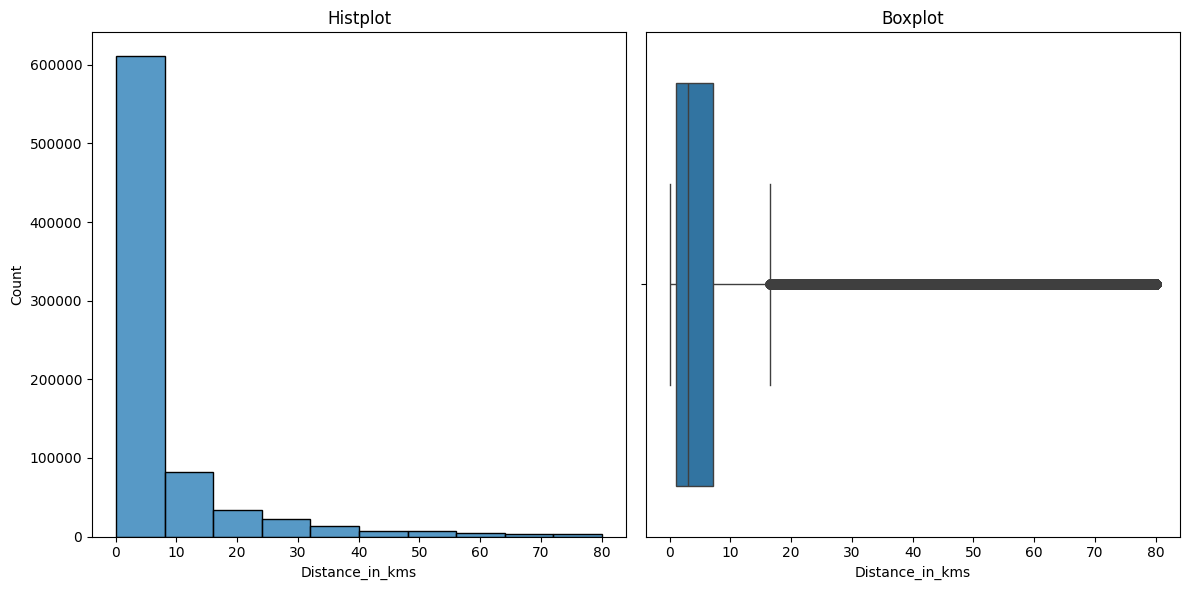

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

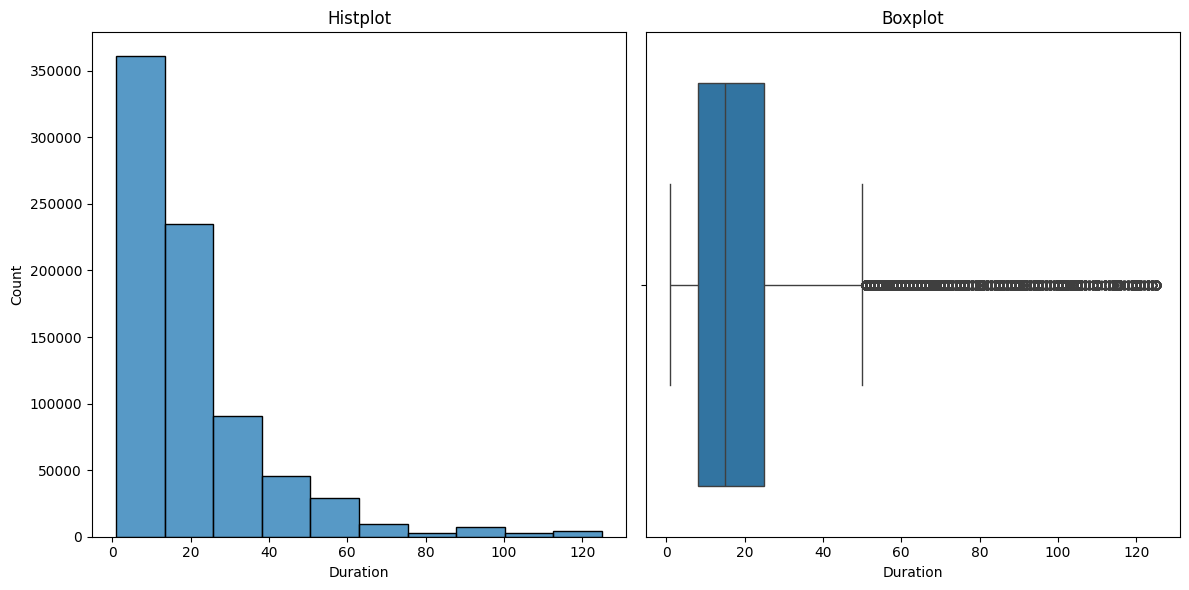

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

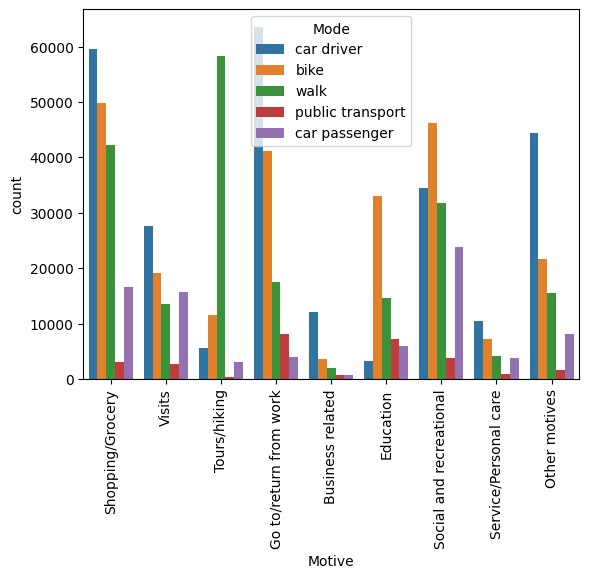

In [67]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

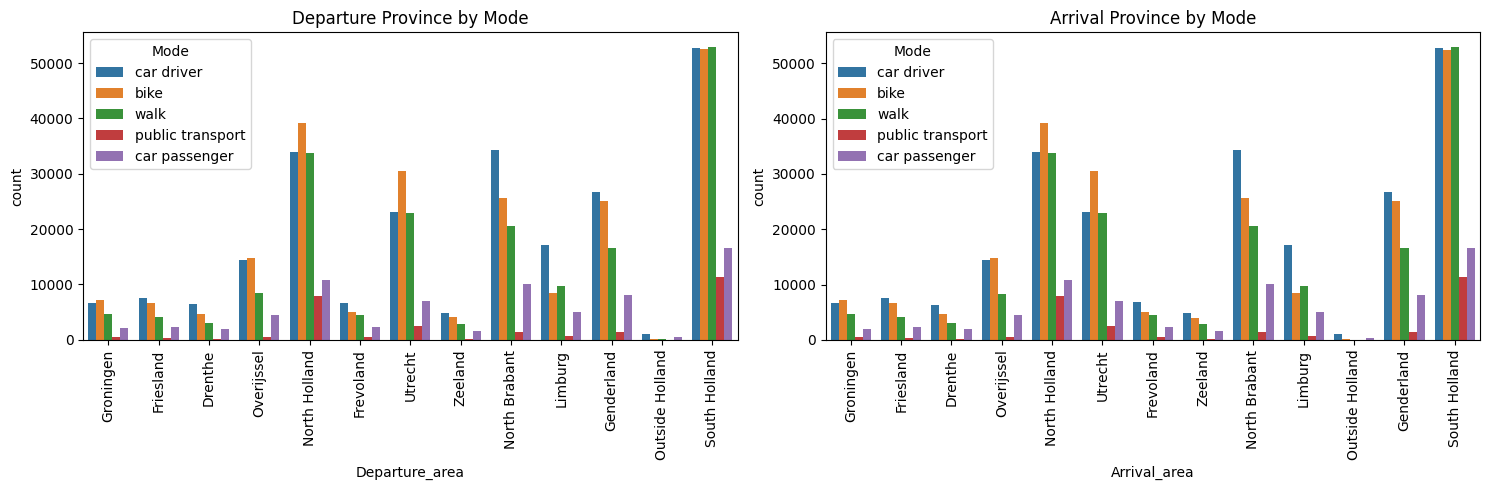

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

countplots = [
    (sns.countplot(x='Departure_area', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_area', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

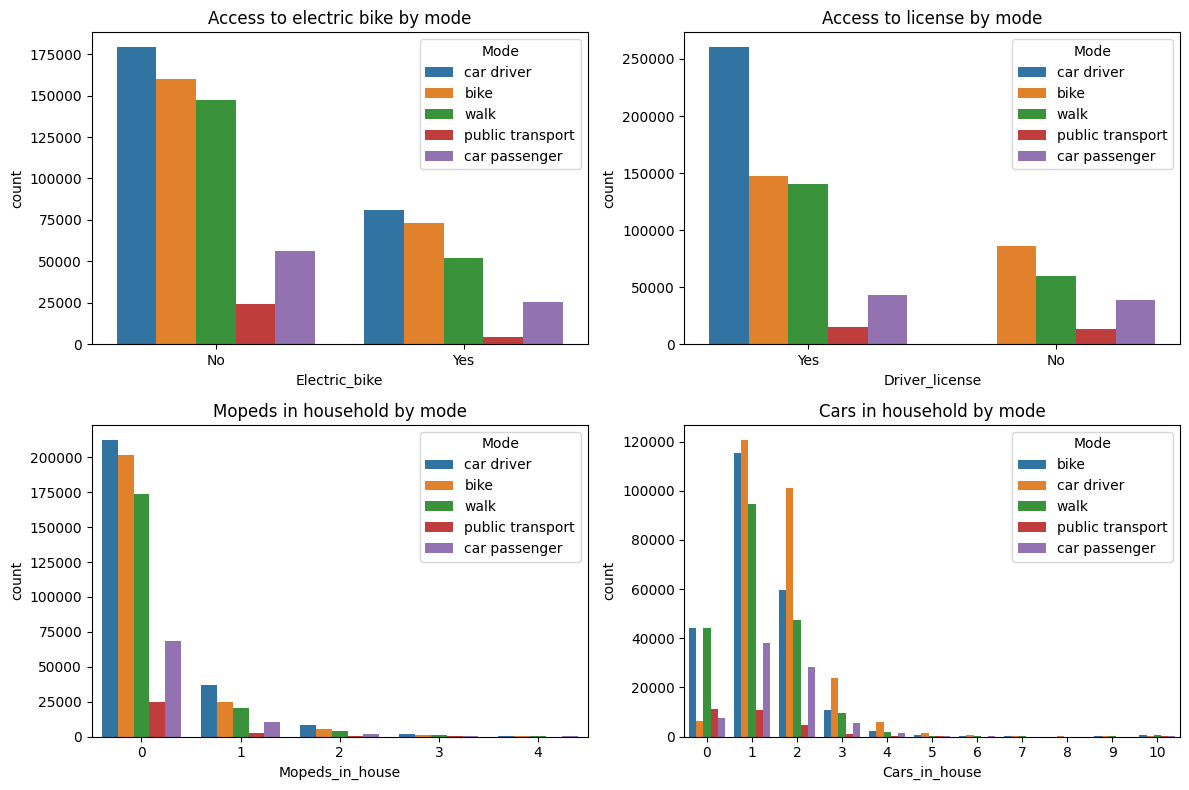

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Access to license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

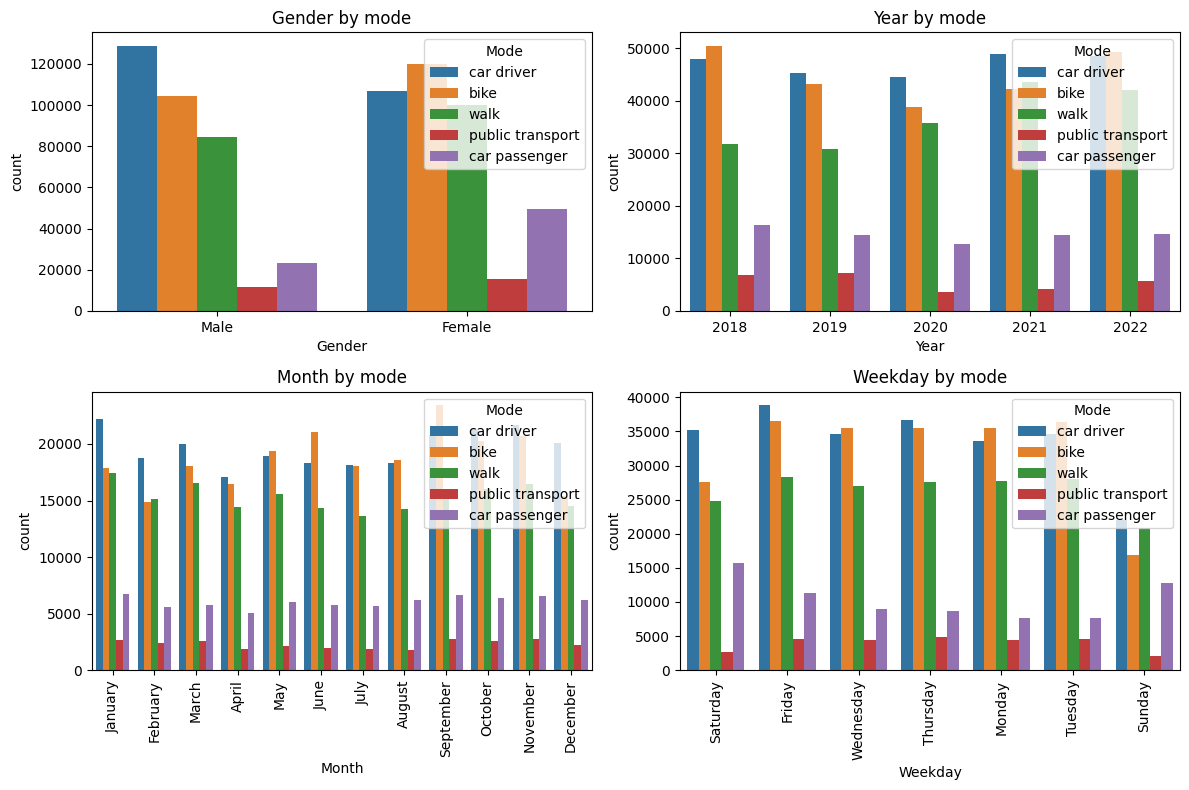

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Year', data=df, hue="Mode", ax=axes[0, 1]), 'Year by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [73]:
df.describe()

,Year,Age,Licences_in_house,Cars_in_house,Mopeds_in_house,Distance,Depart_time,Duration
count,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000,579846.000000
mean,2020.078140,48.428241,1.827604,1.364424,0.043310,86.072564,13.842078,19.873527
std,1.430975,17.495942,0.847572,0.884993,0.236242,116.318589,4.270604,16.538512
min,2018.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
25%,2019.000000,34.000000,1.000000,1.000000,0.000000,15.000000,10.300000,10.000000
50%,2020.000000,48.000000,2.000000,1.000000,0.000000,40.000000,14.000000,15.000000
75%,2021.000000,62.000000,2.000000,2.000000,0.000000,100.000000,17.100000,28.000000
max,2022.000000,90.000000,6.000000,6.000000,4.000000,600.000000,23.590000,100.000000


In [57]:
value_counts = df['Education'].value_counts()
print(value_counts)

Education
Higher education                      334840
Secondary                             231420
Lower vocational                      101336
Not answered/under 15 years of age     87176
Primary education                      24706
Other education                        16090
No education                            6999
Name: count, dtype: int64


In [58]:
print(df.columns)

Index(['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Year', 'Month', 'Weekday',
       'Holiday', 'Round_trip', 'Motive', 'Departure_area', 'Arrival_area',
       'Duration', 'Mode', 'Depart_time', 'Distance_in_kms'],
      dtype='object')


In [59]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Holiday", "Round_trip"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [60]:
le=LabelEncoder()
features=["Departure_area", "Arrival_area"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [65]:
le=LabelEncoder()
features=["Motive", "Background", "Household_composition"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [61]:
value_mapping = {"car driver":0, "bike":1, "walk":2, "car passenger":3, "public transport":4}
df['Mode'] = df['Mode'].replace(value_mapping)

In [62]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [63]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [64]:
value_mapping = {"No education":1, "Not answered/under 15 years of age":2, "Other education":3, "Primary education":4, "Secondary":5, "Lower vocational":6, "Higher education":7}
df['Education'] = df['Education'].replace(value_mapping)

In [66]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,15,0,10.30,6.0
1,1,4,1,42,0,5,1,1,0,0,...,6,0,0,5,4,4,10,0,11.15,6.0
2,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,15.55,1.0
3,1,4,1,42,0,5,1,1,0,0,...,6,0,0,8,4,4,5,1,18.30,1.0
4,2,0,1,42,0,5,1,1,0,0,...,5,0,0,5,4,4,10,0,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,0,49,1,7,1,1,0,0,...,4,0,0,1,7,7,35,0,15.56,11.0
817122,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,7,2,16.50,1.1
817123,3,6,0,49,1,7,1,1,0,0,...,4,0,0,5,7,7,5,2,17.15,0.6
817124,3,6,0,49,1,7,1,1,0,0,...,4,0,0,6,7,7,15,0,18.20,6.3


In [67]:
csv_file_path = 'Dutch_data_processed.csv'
df.to_csv(csv_file_path, index=False)

In [68]:
zip_file_path = 'Dutch_data_processed.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    zipf.write(csv_file_path, arcname='Dutch_data_processed.csv')

In [69]:
import os
os.remove(csv_file_path)